### Get session info
- Data is appended per cell


In [1]:
date = '190128'
dishID = 'dish_2'
cellID = 'cell_1'


In [10]:
# dataPath = '/Volumes/genie/Jihong_GENIE_stuff/Voltron-ST&Kv2.1/'
dataPath = '/Users/zhengj10/Desktop/GENIE/Data/Voltron-ST&Kv2.1/190128/dish_2/cell_1'


### Import modules

In [11]:
import os
from glob import glob
from pywavesurfer import ws
from WC_ephys import get_data, mem_test, get_stimParams, get_rmp, get_threshold, get_AP_params, count_AP
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from termcolor import colored
import unicodedata
import pandas as pd


### Locate data files

In [12]:
# h5files = glob(os.path.join(dataPath, date, dishID, cellID, '*.h5'))
h5files = glob(os.path.join(dataPath, '*.h5'))
h5files = sorted(h5files)
h5files


['/Users/zhengj10/Desktop/GENIE/Data/Voltron-ST&Kv2.1/190128/dish_2/cell_1/trial_0001-0010.h5',
 '/Users/zhengj10/Desktop/GENIE/Data/Voltron-ST&Kv2.1/190128/dish_2/cell_1/trial_0011-0026.h5']

Mem-test
100000.0


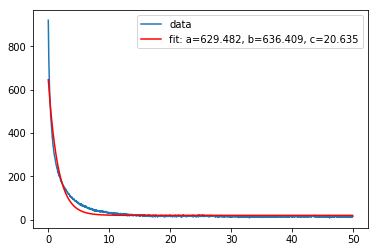

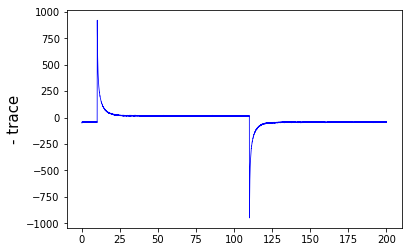

Ra: 10.391617284072016; Rm: 163.2587480561962; Cm: 136.75141007719685, tau: 1.5713155442109021
Seal quality: 5
Ra: 10.39 MΩ
Rm: 163.26 MΩ
Cm: 136.75 pF
Sq: 5
VI


In [13]:
# plt.figure(figsize=(10,4))
for h5data in h5files:
    traces, meta = get_data(h5data)
    print meta['trialType']
    if meta['trialType'] == 'Mem-test':
        print meta['sampleRate']
        meta_MT = meta
        Ra, Rm, Cm, tau, seal_quality = mem_test(h5data, Vstep = -10, height = 100) # Height need to be adjusted
        trace = np.mean(traces, axis=0)
        x = (np.arange(1, trace.shape[0]+1))*1000.0/meta['sampleRate']
        plt.plot(x, -trace, color = 'b', lw = 0.8)
        plt.ylabel('- trace', size = 15)
        plt.show()
        print 'Ra: %s; Rm: %s; Cm: %s, tau: %s' %(Ra, Rm, Cm, tau)
        print 'Seal quality: %s' %(seal_quality)
        print colored('Ra: ', attrs=['bold']) + str(round(Ra, 2)) + ' M' + unicodedata.lookup("GREEK CAPITAL LETTER omega")
        print colored('Rm: ', attrs=['bold']) + str(round(Rm, 2)) + ' M' + unicodedata.lookup("GREEK CAPITAL LETTER omega")
        print colored('Cm: ', attrs=['bold']) + str(round(Cm, 2)) + ' pF'
        print colored('Sq: ', attrs=['bold']) + str(seal_quality)


VI


<Figure size 432x720 with 0 Axes>

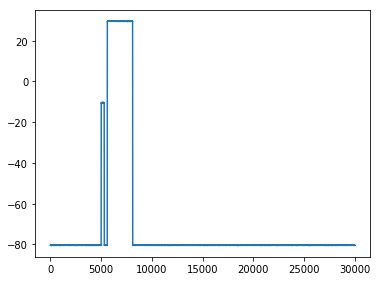

In [24]:
fig = plt.figure(figsize=(6,len(h5files)*5))
i = 1

traces = []
data_as_dict = ws.loadDataFile(h5data)
sortedKeys = sorted(data_as_dict.keys())

sweeps = sortedKeys[1:]
for sweep in sweeps:
    trace = data_as_dict[sweep]['analogScans'][1]
    traces.append(trace)

trialTypeIndex = data_as_dict['header']['StimulusLibrary']['SelectedOutputableIndex'][0]
mapElement = 'element%d' %(trialTypeIndex)
trialType = data_as_dict['header']['StimulusLibrary']['Maps'][mapElement]['Name'][0]
print trialType
ax = fig.add_subplot(len(h5files), 1, i)
i += 1
ax.plot(traces[10])
plt.show()


### Ouput data

In [6]:
logFile = os.path.join(dataPath, 'log_VI.xlsx')
pd.set_option('display.max_columns', 50)
df_log = pd.read_excel(logFile, index_col = 0)
df_log


,Date,Dish,Cell_type,Plasmid,Density,Date_transfection,Cell,Transfected,Remarks
1,190128,dish_2,Hippocampal neuron culture,421,L,190115,cell_1,False,VI experiment control: TTX 2uM
2,190128,dish_2,Hippocampal neuron culture,421,L,190115,cell_2,True,VI experiment control: TTX 2uM
3,190128,dish_2,Hippocampal neuron culture,421,L,190115,cell_3,False,VI experiment control: TTX 2uM
4,190128,dish_2,Hippocampal neuron culture,421,L,190115,cell_4,True,VI experiment control: TTX 2uM; Leak current ~...
5,190128,dish_3,Hippocampal neuron culture,421,L,190115,cell_1,False,VI experiment control: TTX 2uM + GxTx 100nM
6,190128,dish_3,Hippocampal neuron culture,421,L,190115,cell_2,True,VI experiment control: TTX 2uM + GxTx 100nM
7,190128,dish_3,Hippocampal neuron culture,421,L,190115,cell_3,True,VI experiment control: TTX 2uM + GxTx 100nM
8,190128,dish_3,Hippocampal neuron culture,421,L,190115,cell_4,False,VI experiment control: TTX 2uM + GxTx 100nM
9,190128,dish_3,Hippocampal neuron culture,421,L,190115,cell_5,True,VI experiment control: TTX 2uM + GxTx 100nM
10,190128,dish_3,Hippocampal neuron culture,421,L,190115,cell_6,False,VI experiment control: TTX 2uM + GxTx 100nM; 2...


In [7]:
cellType = df_log.loc[(df_log['Date'] == int(date)) & (df_log['Dish'] == dishID) & (df_log['Cell'] == cellID), 'Cell_type'].values[0]
plasmid = df_log.loc[(df_log['Date'] == int(date)) & (df_log['Dish'] == dishID) & (df_log['Cell'] == cellID), 'Plasmid'].values[0]
plasmid = int(plasmid)
density = df_log.loc[(df_log['Date'] == int(date)) & (df_log['Dish'] == dishID) & (df_log['Cell'] == cellID), 'Density'].values[0]
dateTransfection = df_log.loc[(df_log['Date'] == int(date)) & (df_log['Dish'] == dishID) & (df_log['Cell'] == cellID), 'Date_transfection'].values[0]
dateTransfection = int(dateTransfection)
transfected = df_log.loc[(df_log['Date'] == int(date)) & (df_log['Dish'] == dishID) & (df_log['Cell'] == cellID), 'Transfected'].values[0]
transfected = bool(transfected)
remarks = df_log.loc[(df_log['Date'] == int(date)) & (df_log['Dish'] == dishID) & (df_log['Cell'] == cellID), 'Remarks'].values[0]
print (cellType, plasmid, density, dateTransfection, transfected, remarks)


(u'Hippocampal neuron culture', 421, u'L', 190115, False, u'VI experiment control: TTX 2uM')


In [8]:
sessionInfo = {
                u'Date': date,
                u'Dish': dishID,
                u'Cell_type': cellType,
                u'Plasmid': plasmid,
                u'Density': density,
                u'Date_transfection': dateTransfection,
                u'Cell': cellID,
                u'Transfected': transfected,
                u'Ra': Ra,
                u'Rm': Rm,
                u'Cm': Cm,
                u'tau': tau,
                u'Seal_quality': seal_quality,
                u'Remarks': remarks
            }


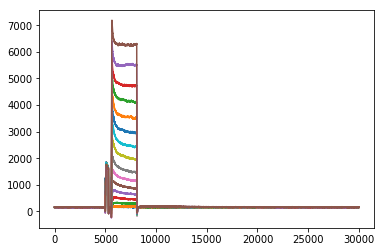

In [9]:
for trace in traces:
    plt.plot(trace)
plt.show()


In [379]:
Ik = []
i = 1
for trace in traces:
    print i
    i+=1
    v = np.mean(trace[6000:6100])/Cm
    Ik.append(v)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [380]:
Ik

[1.2133557684835028,
 1.420604902755616,
 2.360005583598044,
 3.8137154187519178,
 5.594871123839056,
 7.692879471588556,
 10.085000447705145,
 12.782627546433448,
 16.72883320809485,
 20.135306261141164,
 23.686834922286295,
 27.422967183519898,
 31.768370977261306,
 35.63152858365608,
 40.35810038978239,
 46.26724836903967]

In [291]:
x = np.linspace(-70,80,16)
Ik = np.array(Ik)

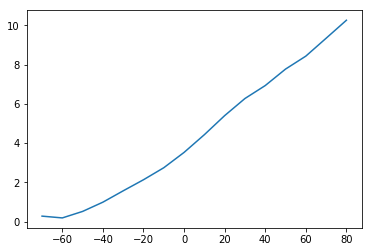

In [292]:
plt.plot(x, Ik, )
plt.show()

In [293]:
# df = df.sort_values(by=['Date', 'Dish', 'Cell'])
# df.to_excel(sumFile)
# df

In [294]:
# df_new = pd.DataFrame(sessionInfo, columns = list(df), index = ['i',]) # columns specification keeps the order of columns; index specification makes sure dict keys are the columns 
# df = df.append(df_new, ignore_index = True)
# df.index = np.arange(1, len(df)+1)
# df.to_excel(sumFile)
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_colwidth', 8)
# df
# # df = df.drop([1])
# # df.index = np.arange(1, len(df)+1)
# # df


In [295]:
# df.to_excel(sumFile)
# df

In [296]:
# idx = len(df)
# df = df.drop(idx)
# df.to_excel(dataPath + '/summary.xlsx')
# df


In [297]:
# sessionInfo['Ith']

### Single AP protocol
- Discarded due to lack of AHP evoked by 1 ms pulses

In [298]:
# plt.figure(figsize=(15,4))
# for h5data in h5files:
#     traces, meta = get_data(h5data)
#     if meta['trialType'] == 'IC-singleAP':
#         trace = traces[0]
# #         AP_info, plotParams = get_AP_shape(h5data)
#         ax1 = plt.subplot(1,3,1)
#         ax1.plot(trace, lw = 0.5, color = 'b')
#         ax2 = plt.subplot(1,3,2)
#         ax2.plot(trace[int(8.5*meta['sampleRate']):int(8.5*meta['sampleRate'])+100], lw = 0.5, color = 'g')
#         ax3 = plt.subplot(1,3,3)
#         ax3.plot(trace[int(9.5*meta['sampleRate']):int(9.5*meta['sampleRate'])+1000], lw = 0.5, color = 'g')
# #         preSpike = int(0.01*meta['sampleRate'])
# #         postSpike = int(0.02*meta['sampleRate'])
# #         ax2.plot(np.arange(time - preSpike, time + postSpike), trace[time - preSpike : time + postSpike], color = 'b', lw = 0.8)
#         plt.show()


In [299]:
# plt.figure(figsize=(12,3))
# ax = plt.subplot(1,1,1)
# # x = np.arange(1,len(traces[0])+1) / float(meta['sampleRate'])
# ax.plot(traces[0], color = 'b', lw = 0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.show()


### Height plotting with plt.plot
- Substitute for plt.hlines() command

In [300]:
# x = trace
# peaks, _ = ss.find_peaks(x, height=0)
# plt.figure(figsize=[12,4])
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
# plt.show()


### Extract values from MultiClamp-700B cfg file

In [301]:
# lines = []
# with open('/Users/zhengj10/Desktop/cell1.txt', 'rt') as cfgFile:
#     for line in cfgFile:
#         lines.append(line)


In [302]:
# import re
# a = [float(s) for s in re.findall(r'-?\d+\.?\d*', lines[214])]
# a

In [303]:
# cm = a[0] * 10**(12+a[1])

### Walk through data folders

In [304]:
# thedir = os.path.join(dataPath, date, dishID, cellID)
# print thedir
# cells = [ name for name in os.listdir(thedir) if os.path.isdir(os.path.join(thedir, name)) ]